In [5]:
# Importamos librerias

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px



In [6]:
# Carga del Dataframe
#df = pd.read_csv(r"C:\Users\Griselda\ProjecteData\Equip_10\Scripts\Sprint_3\df_tourist_python.csv", sep= ';')

#df = pd.read_csv(r"C:\Users\Griselda\ProjecteData\ProjecteData\Equip_10\Scripts\Sprint_3\df_tourist_python.csv", sep= ';')

df = pd.read_csv("df_tourist_python.csv", sep= ';')


Filtre de Numero de Reviews 

Minim 10

In [7]:
df_tru =df[df["number_of_reviews"]>=10]

Filtre numero d'allotjaments per barri

Minim 5

In [8]:
recompte =df_tru.value_counts(["city","neighbourhood_name", "minimum_nights", "maximum_nights"]).reset_index(name = "Recompte")

recompte[recompte["Recompte"]>5]

,city,neighbourhood_name,minimum_nights,maximum_nights,Recompte
0,malaga,Centro,1,1125,41
1,madrid,Embajadores,2,1125,37
2,malaga,Centro,2,1125,36
3,madrid,Embajadores,1,1125,28
4,madrid,Sol,1,1125,26
...,...,...,...,...,...
68,malaga,Este,1,1125,6
69,mallorca,Calvi�,4,1125,6
70,valencia,SANT FRANCESC,1,1125,6
71,madrid,Embajadores,4,1125,6


In [9]:
# Filtrar només els apartaments amb 10 o més ressenyes
df_tru = df[df["number_of_reviews"] >= 10]

# Calcular la mitjana global de la puntuació
mitjana_global = df["review_scores_rating"].mean()

# Filtrar els registres amb puntuació inferior a la mitjana
df_tru = df_tru[df_tru["review_scores_rating"] < mitjana_global]

# Crear taula amb les columnes desitjades
recompte = df_tru.groupby(["city", "neighbourhood_name"]).agg({
    "neighbourhood_name": "count",
    "minimum_nights": "mean",
    "maximum_nights": "mean",
    "review_scores_rating": "mean",
    "number_of_reviews" : "mean"
}).rename(columns={
    "neighbourhood_name": "num_apartaments",
    "review_scores_rating": "mitjana_rating"
}).reset_index()

# Arrodonir mitjanes
recompte[["minimum_nights", "maximum_nights", "mitjana_rating", "number_of_reviews"]] = recompte[["minimum_nights", "maximum_nights", "mitjana_rating", "number_of_reviews"]].round(2)

# Filtrar només els grups amb més de 5 registres i mínim de nits de més de 2.5
recompte = recompte[recompte["num_apartaments"] > 5]
# recompte = recompte[recompte["minimum_nights"] > 2.5]

recompte

,city,neighbourhood_name,num_apartaments,minimum_nights,maximum_nights,mitjana_rating,number_of_reviews
3,barcelona,Hostafrancs,12,2.17,525.83,85.58,36.75
9,barcelona,Sant Antoni,37,1.84,733.11,87.22,63.89
14,barcelona,"Sant Pere, Santa Caterina i la Ribera",34,3.79,555.68,86.03,61.06
15,barcelona,Sants,9,2.22,650.00,86.56,51.56
22,barcelona,el Barri G�tic,42,2.67,822.71,87.31,75.26
23,barcelona,el Bes�s i el Maresme,13,4.54,869.15,86.92,49.15
24,barcelona,el Camp d'en Grassot i Gr�cia Nova,10,1.60,688.00,87.90,100.40
25,barcelona,el Camp de l'Arpa del Clot,12,4.42,580.92,85.25,67.58
26,barcelona,el Carmel,10,2.00,853.70,83.50,30.90
27,barcelona,el Clot,6,1.83,569.17,87.17,24.67


In [10]:
recompte["potencial_optimizacion"] = (
    (1 - recompte["mitjana_rating"] / 100) *  # cuanto más bajo el rating, más potencial
    recompte["number_of_reviews"]             # pero que tenga suficiente actividad
)


Estoy probando de jugar con las ponderaciones, creo que le da demasiado peso los miles de reseñas. tene las minimas ya son mas que suficientes

In [11]:
recompte["potencial_optimizacion"] = (
    #(1 / recompte['mitjana_rating'] + 1) * 0.3 +
    #( (100 - recompte['mitjana_rating'] )) * 1 
    #(1 / (recompte['number_of_reviews'] + 1)) * 1
    (1 / (recompte["maximum_nights"] + 1)) * 0.1 +    # pocas reviews → potencial latente
    ((recompte["minimum_nights"] /10 )) * 0.2 +
    #(1 / (recompte["num_apartaments"] + 1)) * 0.1
    ((100 - recompte['mitjana_rating']) * (1 / (recompte['number_of_reviews'] + 1))) * 0.7
) 

#recompte
altres = recompte[recompte["city"].isin(["girona", "valencia", "malaga", "menorca", "mallorca", "sevilla"])]
altres
#bcn = recompte[recompte["city"] == "barcelona"].sort_values("potencial_optimizacion", ascending=False)
#bcn
pont_aeri = recompte[(recompte["city"] == "barcelona") | (recompte["city"] == "madrid")]
pont_aeri

,city,neighbourhood_name,num_apartaments,minimum_nights,maximum_nights,mitjana_rating,number_of_reviews,potencial_optimizacion
3,barcelona,Hostafrancs,12,2.17,525.83,85.58,36.75,0.310981
9,barcelona,Sant Antoni,37,1.84,733.11,87.22,63.89,0.174800
14,barcelona,"Sant Pere, Santa Caterina i la Ribera",34,3.79,555.68,86.03,61.06,0.233553
15,barcelona,Sants,9,2.22,650.00,86.56,51.56,0.223549
22,barcelona,el Barri G�tic,42,2.67,822.71,87.31,75.26,0.170004
23,barcelona,el Bes�s i el Maresme,13,4.54,869.15,86.92,49.15,0.273487
24,barcelona,el Camp d'en Grassot i Gr�cia Nova,10,1.60,688.00,87.90,100.40,0.115676
25,barcelona,el Camp de l'Arpa del Clot,12,4.42,580.92,85.25,67.58,0.239126
26,barcelona,el Carmel,10,2.00,853.70,83.50,30.90,0.402186
27,barcelona,el Clot,6,1.83,569.17,87.17,24.67,0.386639


grouped['potencial_optimitzacio'] = (
    (10 - grouped['review_scores_rating']/10) * 0.33 +
    (10 - grouped['number_of_reviews']/10) * 0.33 +
    (grouped['availability_365']/365) * 0.33
)


In [25]:
recompte.sort_values("potencial_optimizacion", ascending=False)

,city,neighbourhood_name,num_apartaments,minimum_nights,maximum_nights,mitjana_rating,number_of_reviews,potencial_optimizacion
247,valencia,EL MERCAT,9,10.78,886.56,86.11,45.00,0.427082
26,barcelona,el Carmel,10,2.00,853.70,83.50,30.90,0.402186
200,menorca,Ciutadella de Menorca,14,3.93,669.57,88.00,25.50,0.395730
27,barcelona,el Clot,6,1.83,569.17,87.17,24.67,0.386639
85,girona,Roses,14,2.14,521.64,85.29,29.71,0.378289
37,barcelona,la Barceloneta,11,7.09,924.45,89.36,30.73,0.376639
96,girona,Tossa de Mar,9,2.33,769.89,88.89,25.44,0.340867
176,mallorca,Alc�dia,10,3.70,439.40,89.70,28.30,0.320302
65,girona,Castell� d'Emp�ries,7,2.29,669.57,89.86,25.14,0.317487
75,girona,Lloret de Mar,7,1.43,965.29,87.86,28.57,0.316089


In [13]:
fig = px.scatter(altres,
x="mitjana_rating",
y="number_of_reviews",
size="num_apartaments",
color="potencial_optimizacion",
color_continuous_scale="Greens",
hover_name="neighbourhood_name",
facet_col="city",
title="Potencial de Optimización por Barrio",
labels={
    "mitjana_rating": "Rating medio",
    "number_of_reviews": "Número de reseñas",
    "num_apartaments": "Número de apartamentos",
    "potencial_optimizacion": "Optimización"
},
size_max=40
)
fig.update_layout(
    # plot_bgcolor='#D8F3DC',
    paper_bgcolor='#D8F3DC')
fig.show()


In [14]:
fig = px.scatter(pont_aeri,
x="mitjana_rating",
y="number_of_reviews",
size="num_apartaments",
color="potencial_optimizacion",
color_continuous_scale="Greens",
hover_name="neighbourhood_name",
facet_col="city",
title="Potencial de Optimización por Barrio",
labels={
    "mitjana_rating": "Rating medio",
    "number_of_reviews": "Número de reseñas",
    "num_apartaments": "Número de apartamentos",
    "potencial_optimizacion": "Optimización"
},
size_max=40
)
fig.update_layout(
    # plot_bgcolor='#D8F3DC',
    paper_bgcolor='#D8F3DC')

fig.show()

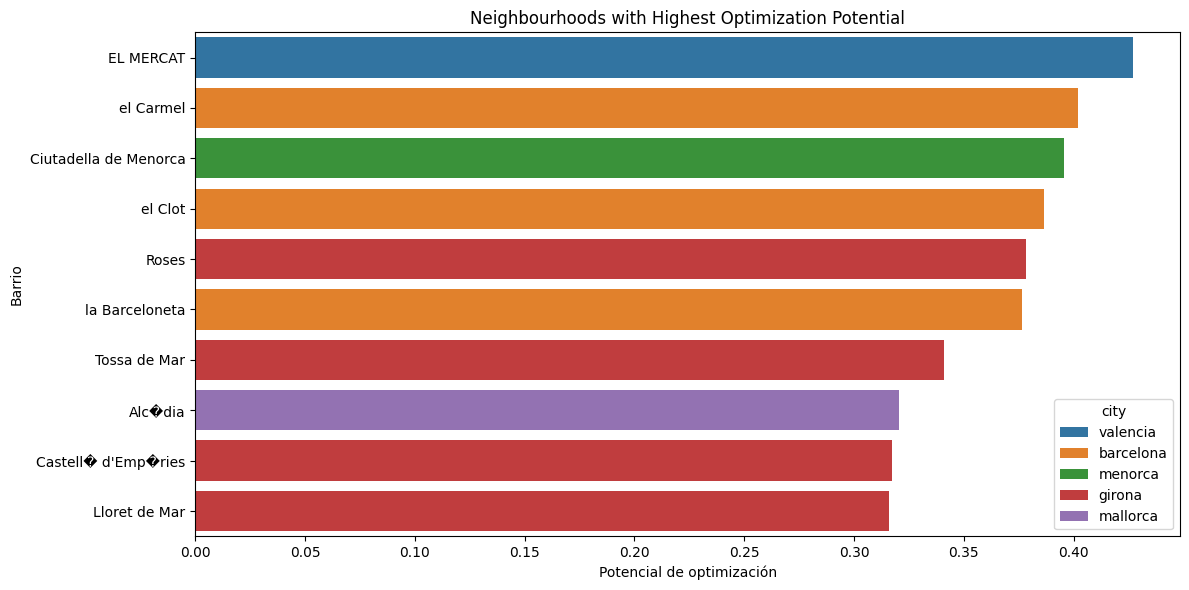

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sort by index value (descending = more potential)
top_neigh = recompte.sort_values("potencial_optimizacion", ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(data=top_neigh, x="potencial_optimizacion", y="neighbourhood_name", hue="city", dodge=False)
plt.title("Neighbourhoods with Highest Optimization Potential")
plt.xlabel("Potencial de optimización")
plt.ylabel("Barrio")
plt.tight_layout()
plt.show()


In [16]:
import plotly.express as px

# Sort by potencial_optimizacion descending
top_neigh = recompte.sort_values("potencial_optimizacion", ascending=False).head(10)

# Extract unique cities from top_neigh in order of appearance
unique_cities = top_neigh['city'].unique()

# Define a green discrete color palette with enough shades for your cities
# Here are some green shades, you can add/remove depending on number of cities
green_palette = [
    "#004d00",  # dark green
    "#237a23",
    "#4ca64c",
    "#80c080",
    "#b3d9b3",
    "#d6f5d6",
    "#99cc99",
    "#66b366",
    "#339933",
    "#1a801a"
]

# Map cities to the green colors (slice to number of unique cities)
color_map = {city: green_palette[i] for i, city in enumerate(unique_cities)}

fig = px.bar(
    top_neigh,
    x="potencial_optimizacion",
    y="neighbourhood_name",
    color="city",
    category_orders={"neighbourhood_name": top_neigh['neighbourhood_name'].tolist()},  # preserve descending order
    color_discrete_map=color_map,
    orientation='h',
    title="Barios con más potencial de optimización",
    labels={"potencial_optimizacion": "Potencial de optimización", "neighbourhood_name": "Barrio"},
)

fig.update_layout(
    plot_bgcolor='#D8F3DC',
    paper_bgcolor='#D8F3DC')

fig.show()


C:\Users\Eloi\AppData\Local\Temp\ipykernel_18676\828586786.py:38: UserWarning:

Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.



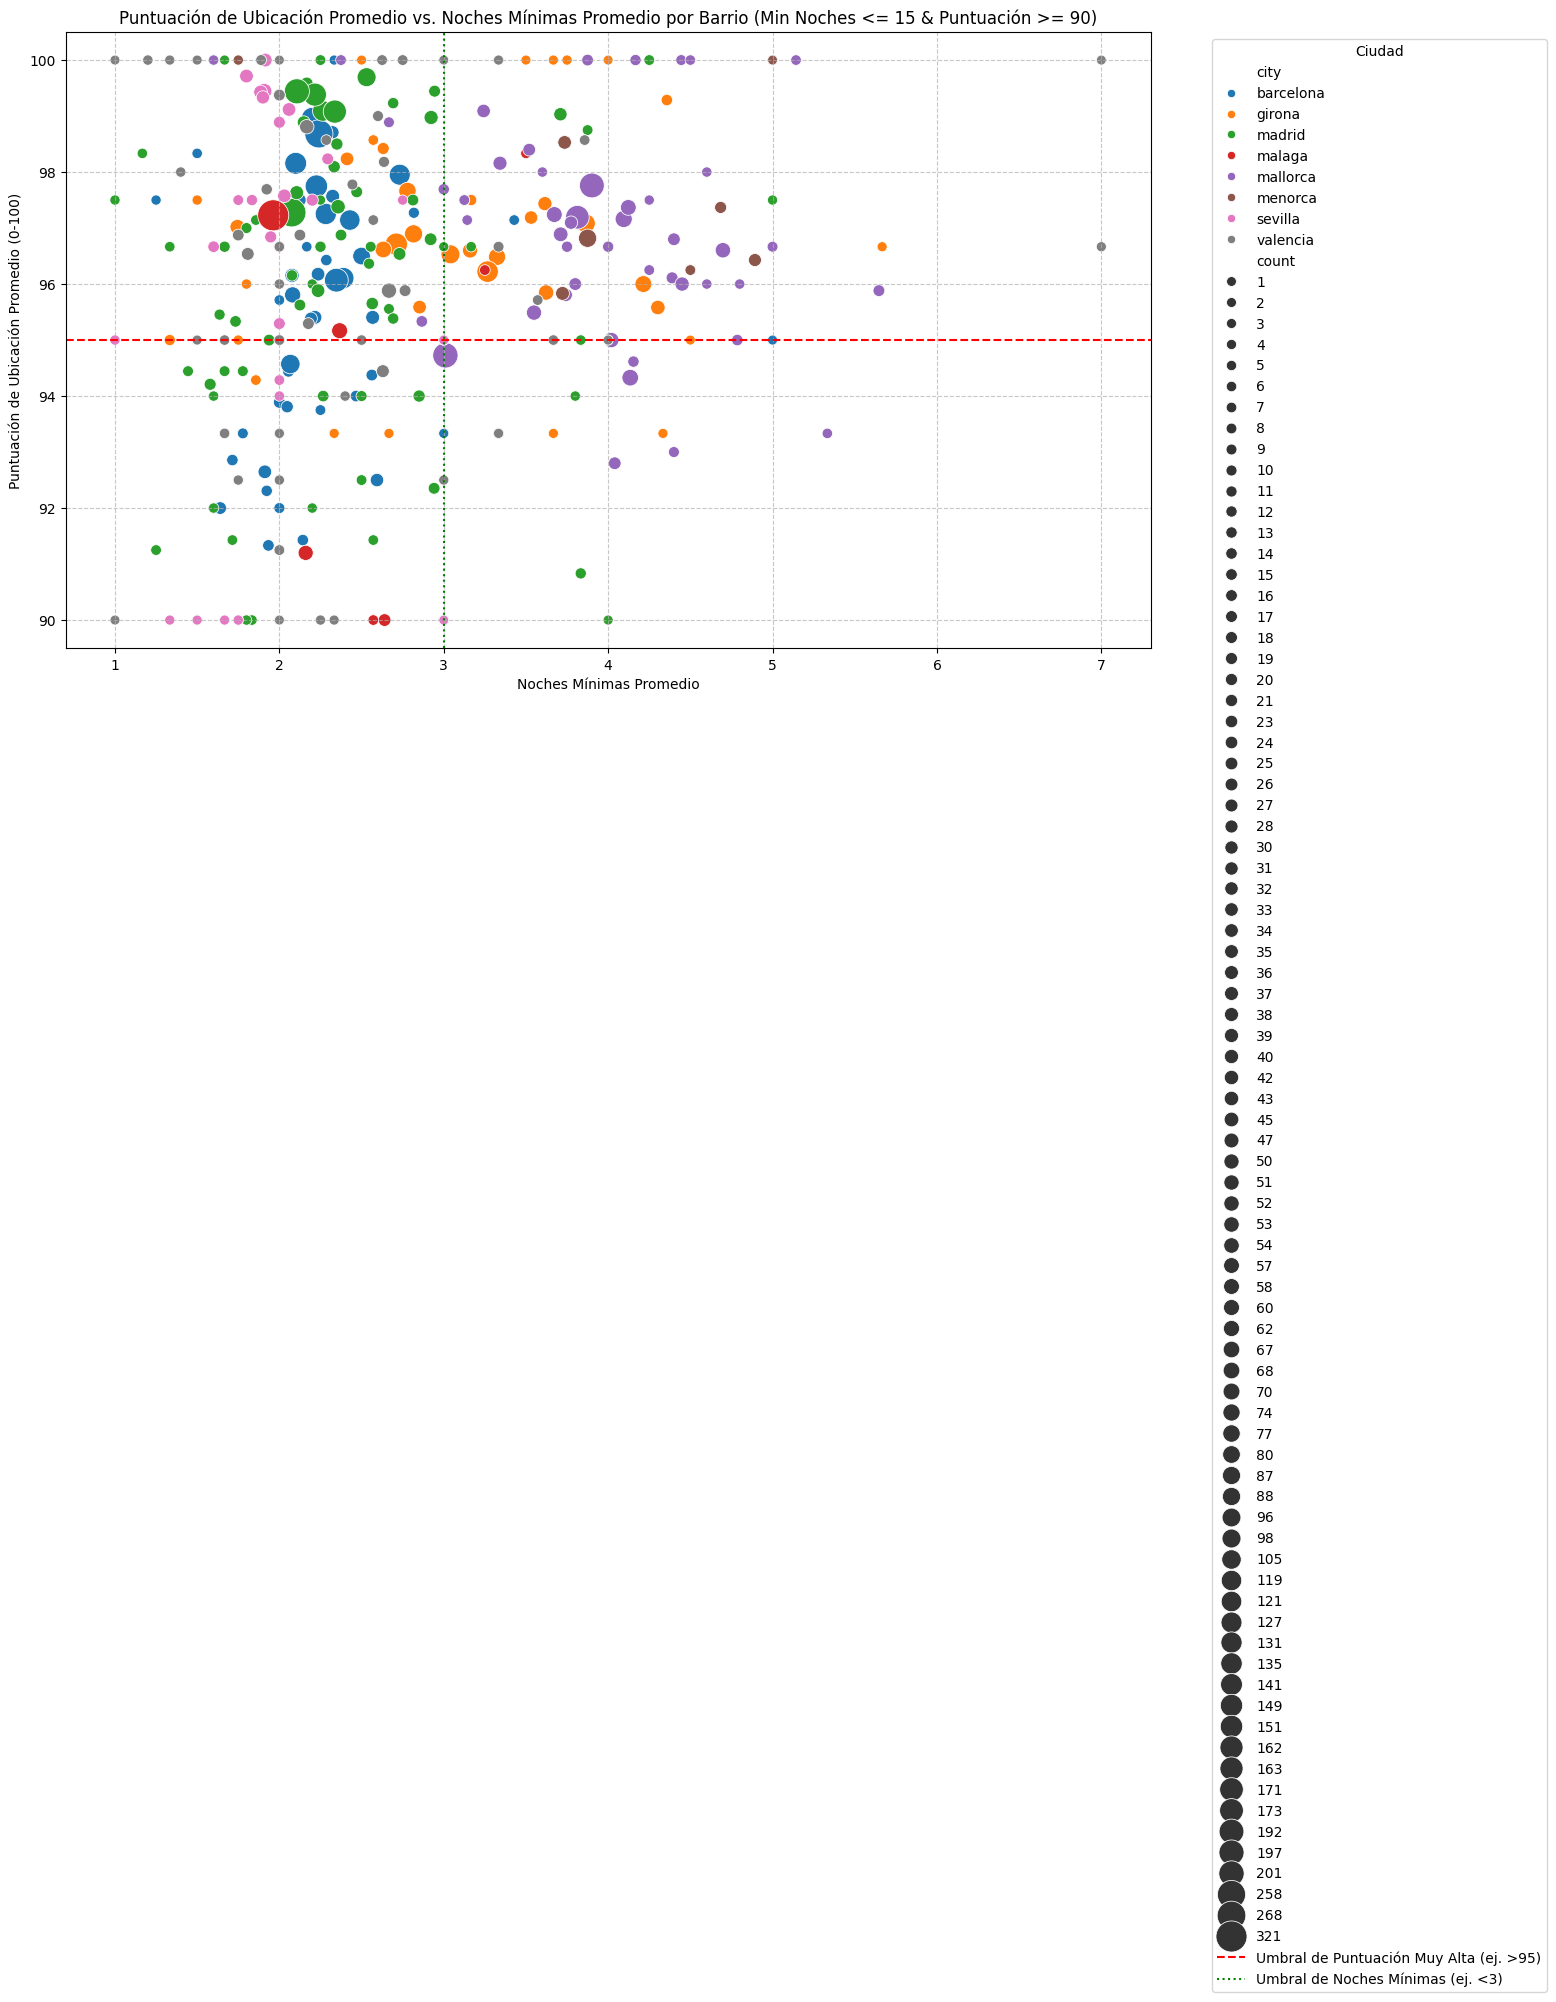

In [17]:


df

# Recreando tu DataFrame de ejemplo

# --- PASO 1: Filtrar el DataFrame original por 'minimum_nights' <= 40 ---
df_filtered_nights = df[df["minimum_nights"] <= 15].copy()

# --- PASO 2: Recalcular los promedios por barrio (neighbourhood_name) con el DataFrame filtrado ---
# Agrupar por (city, neighbourhood_name) para asegurar unicidad y correcta agrupación
neighbourhood_avg_filtered = df_filtered_nights.groupby(['city', 'neighbourhood_name']).agg(
    avg_review_scores_location=('review_scores_location', 'mean'),
    avg_minimum_nights=('minimum_nights', 'mean'),
    avg_maximum_nights=('maximum_nights', 'mean'),
    avg_price=('price', 'mean'),
    count=('neighbourhood_name', 'size')
).reset_index()

# --- PASO 3: Filtrar los barrios con alta puntuación de ubicación de los *nuevos* promedios ---
high_score_neighbourhoods_filtered = neighbourhood_avg_filtered[
    neighbourhood_avg_filtered['avg_review_scores_location'] >= 90
].copy()

# --- PASO 4: Visualizar sin los nombres de los barrios ---
plt.figure(figsize=(14, 8))
sns.scatterplot(x='avg_minimum_nights', y='avg_review_scores_location', hue='city', size='count', sizes=(50, 500),
                data=high_score_neighbourhoods_filtered, legend='full')

# Eliminamos el bucle 'for i, row in high_score_neighbourhoods_filtered.iterrows():'
# que se encargaba de añadir las etiquetas de texto de los nombres de los barrios.

plt.title('Puntuación de Ubicación Promedio vs. Noches Mínimas Promedio por Barrio (Min Noches <= 15 & Puntuación >= 90)')
plt.xlabel('Noches Mínimas Promedio')
plt.ylabel('Puntuación de Ubicación Promedio (0-100)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.axhline(y=95, color='r', linestyle='--', label='Umbral de Puntuación Muy Alta (ej. >95)')
plt.axvline(x=3, color='g', linestyle=':', label='Umbral de Noches Mínimas (ej. <3)')
plt.legend(title='Ciudad', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

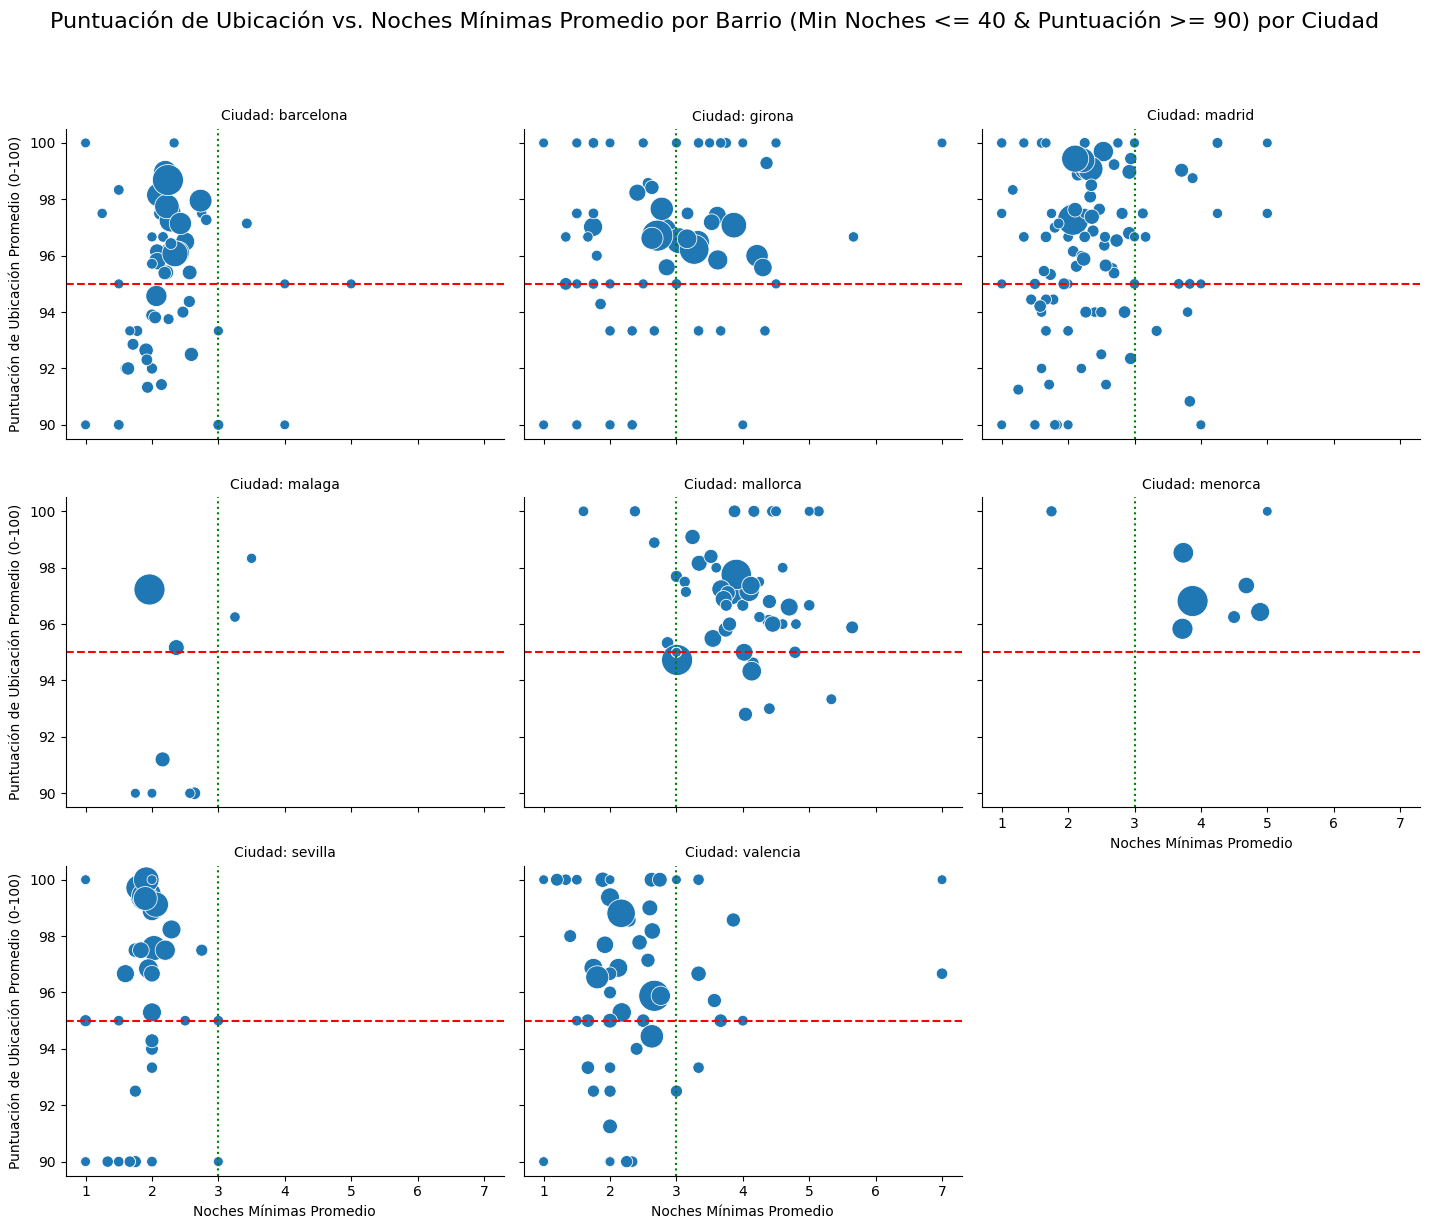

In [18]:

# Recreando tu DataFrame de ejemplo

# --- PASO 1: Filtrar el DataFrame original por 'minimum_nights' <= 40 ---
df_filtered_nights = df[df["minimum_nights"] <= 15].copy()

# --- PASO 2: Recalcular los promedios por barrio (neighbourhood_name) con el DataFrame filtrado ---
# Agrupar por (city, neighbourhood_name) para asegurar unicidad y correcta agrupación
neighbourhood_avg_filtered = df_filtered_nights.groupby(['city', 'neighbourhood_name']).agg(
    avg_review_scores_location=('review_scores_location', 'mean'),
    avg_minimum_nights=('minimum_nights', 'mean'),
    avg_maximum_nights=('maximum_nights', 'mean'),
    avg_price=('price', 'mean'),
    count=('neighbourhood_name', 'size')
).reset_index()

# --- PASO 3: Filtrar los barrios con alta puntuación de ubicación de los *nuevos* promedios ---
high_score_neighbourhoods_filtered = neighbourhood_avg_filtered[
    neighbourhood_avg_filtered['avg_review_scores_location'] >= 90
].copy()

# --- PASO 4: Visualizar utilizando FacetGrid para separar por ciudad ---

# Crear el FacetGrid. 'col="city"' crea una columna para cada ciudad.
# 'col_wrap' controla cuántas columnas queremos antes de pasar a la siguiente fila.
# 'height' y 'aspect' controlan el tamaño de cada subgráfico.
g = sns.FacetGrid(high_score_neighbourhoods_filtered, col="city", col_wrap=3, height=4, aspect=1.2, sharex=True, sharey=True)

# Mapear el scatterplot a cada subgráfico
# Usamos 'size' para el tamaño de la burbuja, pero no 'hue' porque ya estamos separando por ciudad en las columnas
g.map_dataframe(sns.scatterplot, x='avg_minimum_nights', y='avg_review_scores_location', size='count', sizes=(50, 500))

# Añadir las líneas de umbral a cada subgráfico
g.map(plt.axhline, y=95, color='r', linestyle='--', label='Umbral de Puntuación Muy Alta (ej. >95)')
g.map(plt.axvline, x=3, color='g', linestyle=':', label='Umbral de Noches Mínimas (ej. <3)')

# Configurar títulos y etiquetas para cada subgráfico
g.set_titles("Ciudad: {col_name}")
g.set_axis_labels("Noches Mínimas Promedio", "Puntuación de Ubicación Promedio (0-100)")

# Añadir una leyenda para los tamaños de las burbujas (si es relevante, podría ser un poco redundante si 'count' es siempre 1)
# g.add_legend(title='Número de Propiedades') # Se puede añadir si es necesario

# Ajustar el título principal de todo el gráfico
plt.suptitle('Puntuación de Ubicación vs. Noches Mínimas Promedio por Barrio (Min Noches <= 40 & Puntuación >= 90) por Ciudad', y=1.02, fontsize=16)

# Ajustar el layout para evitar solapamientos
plt.tight_layout(rect=[0, 0, 1, 0.98]) # Ajusta el rectángulo para dejar espacio para el suptitle

# Mostrar el gráfico
plt.show()

In [19]:
metrics = df.groupby(['city', 'neighbourhood_name']).agg(
    avg_review=('review_scores_rating', 'mean'),
    avg_location=('review_scores_location', 'mean'),
    avg_availability=('availability_365', 'mean'),
    total_listings=('apartment_id', 'count')
).reset_index()


In [20]:
# Normalització de variables (escala 0-100)
metrics['norm_availability'] = 100 - (metrics['avg_availability']/3.65)
metrics['optimization_score'] = (
    metrics['avg_review']*0.4 + 
    metrics['avg_location']*0.3 + 
    metrics['norm_availability']*0.3
)


In [21]:
top_areas = metrics.sort_values('optimization_score', ascending=False)
top_areas = top_areas[top_areas['total_listings'] > 5]  # Filtrar per fiabilitat

print("Top 5 àrees d'oportunitat:")
print(top_areas.head(5)[['city', 'neighbourhood_name', 'optimization_score']])


Top 5 àrees d'oportunitat:
         city neighbourhood_name  optimization_score
223    madrid      Bellas Vistas           89.507347
477  valencia   EL PLA DEL REMEI           88.902055
217    madrid        Almendrales           88.394216
300    madrid              Rejas           88.057534
215    madrid            Almagro           88.053120


In [22]:

fig = px.treemap(top_areas.head(10),
                 path=['city', 'neighbourhood_name'],
                 values='optimization_score',
                 color='avg_availability',
                 hover_data=['avg_review', 'avg_location'])
fig.show()


In [23]:

# Netegem noms de columnes
df.columns = df.columns.str.strip()

# Ens quedem amb les columnes rellevants
cols = [
    'city', 'neighbourhood_name', 'review_scores_rating', 'review_scores_location',
    'availability_365', 'number_of_reviews'
]
df_filtered = df[cols].copy()

# Filtre opcional: només allotjaments amb almenys 10 ressenyes
df_filtered = df_filtered[df_filtered['number_of_reviews'] >= 10]

# Agrupem per ciutat i barri
grouped = df_filtered.groupby(['city', 'neighbourhood_name']).agg({
    'review_scores_rating': 'mean',
    'availability_365': 'mean',
    'number_of_reviews': 'sum',
    'neighbourhood_name': 'count'  # nombre d'allotjaments
}).rename(columns={'neighbourhood_name': 'num_allotjaments'})

# Calculem un índex de potencial d'optimització
# Baixa puntuació i alta disponibilitat = més potencial de millora
grouped['potencial_optimitzacio'] = (
    (10 - grouped['review_scores_rating']/10) * 0.33 +
    (10 - grouped['number_of_reviews']/10) * 0.33 +
    (grouped['availability_365']/365) * 0.33
)

# Ordenem pel potencial descendent
resultats = grouped.sort_values('potencial_optimitzacio', ascending=False)

# Mostrem els 10 primers barris amb més potencial
print(resultats.head(10))



                                 review_scores_rating  availability_365  \
city      neighbourhood_name                                              
madrid    La Paz                                 80.0             304.0   
valencia  NATZARET                               85.0             365.0   
girona    Sant Climent Sescebes                  86.0             350.0   
          Seriny�                                92.0             364.0   
barcelona la Guineueta                           89.0             344.0   
valencia  EL SALER                               93.0             279.0   
girona    Vilamaniscle                           96.0             351.0   
valencia  CAMI FONDO                             96.0             347.0   
madrid    San Pascual                            95.0             333.0   
girona    Pardines                               91.0             330.0   

                                 number_of_reviews  num_allotjaments  \
city      neighbourhood_nam

In [24]:

df.columns = df.columns.str.strip()  # Netejar noms de columna

# Columnes que farem servir
cols = [
    'city', 'neighbourhood_name', 'review_scores_rating',
    'number_of_reviews', 'minimum_nights', 'maximum_nights'
]
df_filtered = df[cols].copy()

# Filtre opcional: només allotjaments amb almenys 10 ressenyes
df_filtered = df_filtered[df_filtered['number_of_reviews'] >= 10]

# Agrupar per ciutat i barri
grouped = df_filtered.groupby(['city', 'neighbourhood_name']).agg({
    'review_scores_rating': 'mean',
    'number_of_reviews': 'sum',
    'minimum_nights': 'mean',
    'maximum_nights': 'mean',
    'neighbourhood_name': 'count'  # nombre d'allotjaments
}).rename(columns={'neighbourhood_name': 'num_allotjaments'})

# Calcular un índex de potencial d’optimització
# -> més potencial si hi ha moltes ressenyes però baixa puntuació
grouped['potencial_optimitzacio'] = (
    (10 - grouped['review_scores_rating']/10) * grouped['number_of_reviews']
)

# Ordenar pel potencial de millora
resultats = grouped.sort_values('potencial_optimitzacio', ascending=False)

# Mostrar les 10 zones amb més potencial
print(resultats[['potencial_optimitzacio', 'minimum_nights', 'maximum_nights', "review_scores_rating", "number_of_reviews"]].head(10))


                                           potencial_optimitzacio  \
city      neighbourhood_name                                        
madrid    Embajadores                                 8039.723377   
barcelona la Dreta de l'Eixample                      7847.299291   
malaga    Centro                                      7515.427108   
madrid    Sol                                         6985.859341   
          Universidad                                 5954.270270   
barcelona el Barri G�tic                              5333.949315   
          el Raval                                    5007.359551   
          Sant Antoni                                 4459.782051   
          la Sagrada Fam�lia                          4445.210959   
          l'Antiga Esquerra de l'Eixample             4286.569412   

                                           minimum_nights  maximum_nights  \
city      neighbourhood_name                                                
madrid    Embajad